# Pandas, eine Alternative zur herkömmlichen Tabellenkalkulation? {-}

von Matthäus Morhart

# Was ist Pandas?

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

Quelle: https://pandas.pydata.org/

![](img/pandaswebsite.png)

# Erste Schritte mit Pandas
## Welche Dateiformate kann Pandas verarbeiten?

- Comma seperated value (CSV)
- Microsoft Office Excel
- JavaScript Object Notation (JSON)
- HTML Tabellen
- Hierarchical Data Format (HDF)
- Feather Table Format
- Apache Parquet Data storage format
- SAS Analytic Software 
- Sturctured query language (SQL)
- Google BigQuery (GBQ)

## Importieren des Moduls Pandas 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Erstellen eines DataFrames

In [2]:
data = {
    'w': [25, 35, 32, 40, 50, 29, 42, 43, 35, 34, 38, 29],
    'm': [24, 34, 35, 27, 25, 39, 36, 36, 34, 35, 36, 31],
    
}

df = pd.DataFrame(data)

In [3]:
df

,w,m
0,25,24
1,35,34
2,32,35
3,40,27
4,50,25
5,29,39
6,42,36
7,43,36
8,35,34
9,34,35


### Deskriptive statistische Werte generieren

In [4]:
df.describe()

,w,m
count,12.000000,12.000000
mean,36.000000,32.666667
std,7.019453,4.830459
min,25.000000,24.000000
25%,31.250000,30.000000
50%,35.000000,34.500000
75%,40.500000,36.000000
max,50.000000,39.000000


### Signifikanz

In [5]:
stats.ttest_ind(df.w, df.m)

Ttest_indResult(statistic=1.3551361518250882, pvalue=0.1891261025655907)

## Einlesen einer CSV
Quelle: https://github.com/justmarkham/pandas-videos/blob/master/data/stocks.csv

In [6]:
pd.read_csv('data/data.csv')

,Date;Close;Volume;Symbol
0,2016-10-03;31.50;14070500;CSCO
1,2016-10-03;112.52;21701800;AAPL
2,2016-10-03;57.42;19189500;MSFT
3,2016-10-04;113.00;29736800;AAPL
4,2016-10-04;57.24;20085900;MSFT
5,2016-10-04;31.35;18460400;CSCO
6,2016-10-05;57.64;16726400;MSFT
7,2016-10-05;31.59;11808600;CSCO
8,2016-10-05;113.05;21453100;AAPL


### Spalten generieren

In [7]:
pd.read_csv('data/data.csv', delimiter=';')

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


### Datentypen der Spalten ausgeben und ändern

In [8]:
pd.read_csv('data/data.csv', delimiter=';').dtypes

Date       object
Close     float64
Volume      int64
Symbol     object
dtype: object

Die Spalte *Date* ist ein *object*. *Object* ist ein *string* also ein Textfeld.

Um später Datum-Berechnungen durchführen zu können muss diese Spalte zu *datetime64* umgeändert werden.

In [9]:
pd.read_csv('data/data.csv', delimiter=';', parse_dates=['Date'])

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [10]:
pd.read_csv('data/data.csv', delimiter=';', parse_dates=['Date']).dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Symbol            object
dtype: object

### Die Tabelle der Variable *stock* übergeben

In [11]:
stock = pd.read_csv('data/data.csv', delimiter=';', parse_dates=['Date'])

In [12]:
stock

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


## Visualisierung

In [13]:
stock.groupby([stock.Symbol, stock.Date]).Volume.mean()

Symbol  Date      
AAPL    2016-10-03    21701800
        2016-10-04    29736800
        2016-10-05    21453100
CSCO    2016-10-03    14070500
        2016-10-04    18460400
        2016-10-05    11808600
MSFT    2016-10-03    19189500
        2016-10-04    20085900
        2016-10-05    16726400
Name: Volume, dtype: int64

In [14]:
stock.groupby([stock.Symbol, stock.Date]).Volume.mean().unstack(level=0)

Symbol,AAPL,CSCO,MSFT
Date,,,
2016-10-03,21701800,14070500,19189500
2016-10-04,29736800,18460400,20085900
2016-10-05,21453100,11808600,16726400


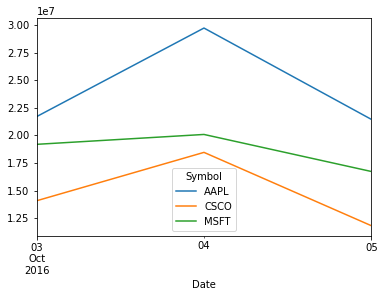

In [15]:
stock.groupby([stock.Symbol, stock.Date]).Volume.mean().unstack(level=0).plot()

#plt.savefig('1', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
stock.groupby([stock.Symbol, stock.Date]).Close.mean()

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [17]:
stock.groupby([stock.Symbol, stock.Date]).Close.mean().unstack(level=0)

Symbol,AAPL,CSCO,MSFT
Date,,,
2016-10-03,112.52,31.50,57.42
2016-10-04,113.00,31.35,57.24
2016-10-05,113.05,31.59,57.64


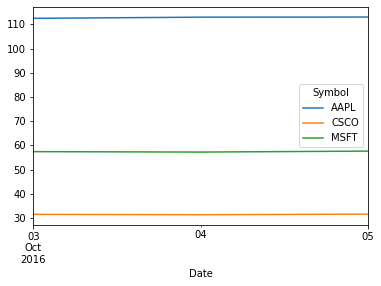

In [18]:
stock.groupby([stock.Symbol, stock.Date]).Close.mean().unstack(level=0).plot()

#plt.savefig('2', dpi=300, bbox_inches='tight')
plt.show()

# London bike sharing data
Quelle: Kaggle.com

In [19]:
bike = pd.read_csv('data/london_merged.csv', parse_dates=['timestamp'])

In [20]:
bike

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


## Erklärung der Daten in den Spalten

1. "timestamp" - timestamp field for grouping the data
2. "cnt" - the count of a new bike shares
3. "t1" - real temperature in C
4. "t2" - temperature in C "feels like"
5. "hum" - humidity in percentage
6. "windspeed" - wind speed in km/h
7. "weathercode" - category of the weather
    * 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
    * 2 = scattered clouds / few clouds
    * 3 = Broken clouds
    * 4 = Cloudy
    * 7 = Rain/ light Rain shower/ Light rain
    * 10 = rain with thunderstorm
    * 26 = snowfall
    * 94 = Freezing Fog
8. "isholiday" - boolean field - 1 holiday / 0 non holiday
9. "isweekend" - boolean field - 1 if the day is weekend
10. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


## Heatmap erstellen

In [21]:
bike['dthour'] = bike.timestamp.dt.hour
corr = bike.loc[:, 'cnt':'dthour'].astype('float64').corr().round(1)

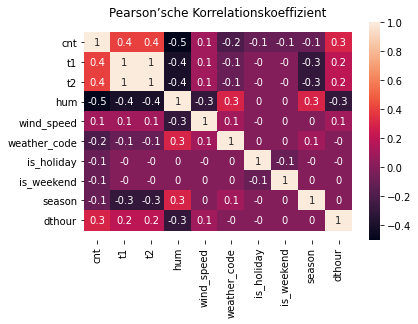

In [22]:
fig, axes = plt.subplots(1,1, figsize=(6, 4))
sns.heatmap(corr, annot=True, ax=axes)
axes.set_title('Pearson’sche Korrelationskoeffizient')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [23]:
bike.loc[(bike.season == 3)].timestamp

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 4330, dtype: datetime64[ns]

## Temperatur

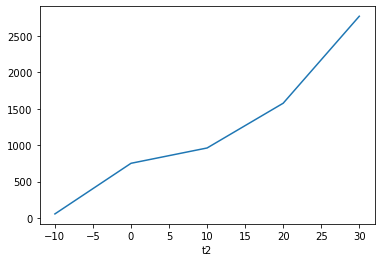

In [24]:
bike.groupby(bike.t2.round(-1)).cnt.mean().plot()
plt.show()

## Wochentag

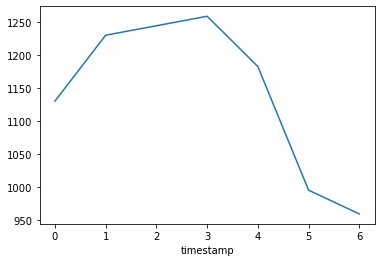

In [25]:
bike.groupby(bike.timestamp.dt.weekday).cnt.mean().plot()
plt.show()

## Tageszeit

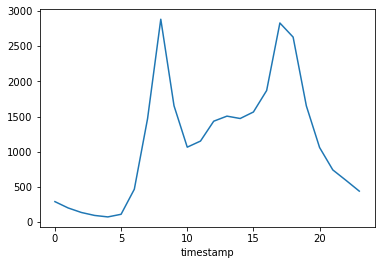

In [26]:
bike.groupby(bike.timestamp.dt.hour).cnt.mean().plot()
plt.show()

noch ein slide nach unten

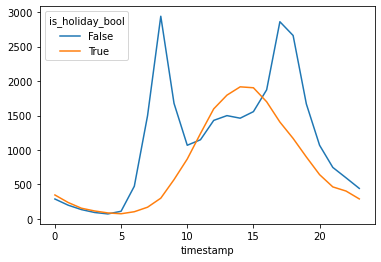

In [27]:
bike['is_holiday_bool'] = bike.is_holiday == 1
bike.groupby([bike.is_holiday_bool, bike.timestamp.dt.hour]).cnt.mean().unstack(0).plot()
plt.show()

## Monat

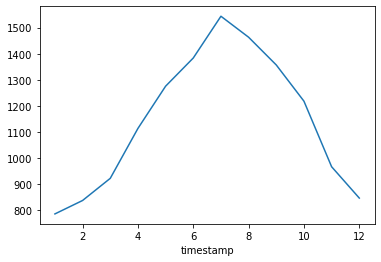

In [28]:
bike.groupby(bike.timestamp.dt.month).cnt.mean().plot()
plt.show()

### Signifikanz: Sommermonate zum Rest

In [29]:
chmonth = list(range(6,8)) # range July:August
               
g1 = bike.loc[bike.timestamp.dt.month.isin(chmonth)]
g2 = bike.loc[~bike.timestamp.dt.month.isin(chmonth)]

stats.ttest_ind(g1.cnt, g2.cnt, equal_var=False)

Ttest_indResult(statistic=15.69595534594747, pvalue=7.991619285771733e-54)

## Windgeschwindigkeit

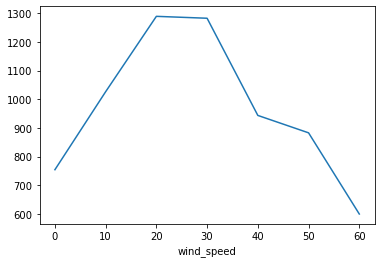

In [30]:
bike.groupby(bike.wind_speed.round(-1)).cnt.mean().plot()
plt.show()

## Wetter

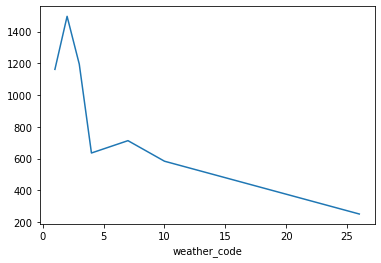

In [31]:
bike.groupby(bike.weather_code).cnt.mean().plot()
plt.show()

Danke für Eure Aufmerksamkeit!


Tutorials:

- https://www.youtube.com/user/dataschool/
- https://github.com/justmarkham/pandas-videos


Installation:

https://www.anaconda.com/